In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

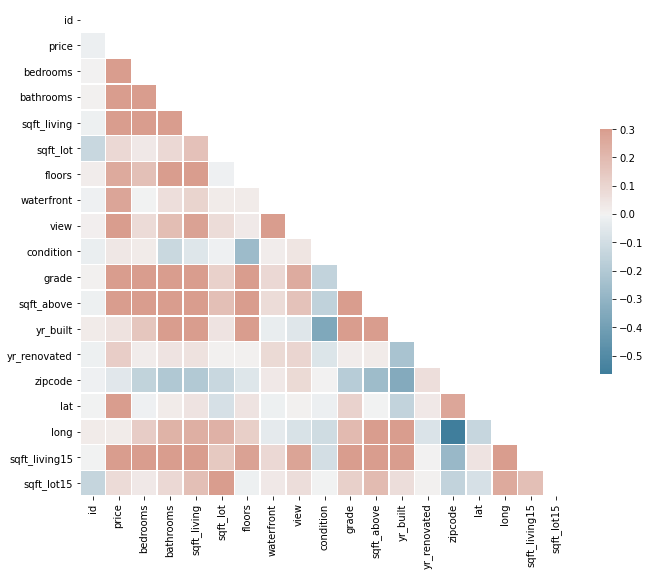

In [3]:
df= pd.read_csv('data/kc_house_data.csv')
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
from geopy import distance

lat_long = df['lat'].astype(str) + ',' + df['long'].astype(str)
lat_long = list(map(eval, lat_long)) 

Seattle = (47.6062, -122.3321)
miles = []
for i in lat_long:
    miles.append(round(distance.distance(i, Seattle).miles, 1))
df['distance'] = miles

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df=df[['price','sqft_living','bedrooms','bathrooms','floors','grade','condition','yr_built','yr_renovated','waterfront', 'distance']]
df

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,yr_built,yr_renovated,waterfront,distance
0,221900.0,1180,3,1.00,1.0,7,3,1955,0.0,NaN,7.4
1,538000.0,2570,3,2.25,2.0,7,3,1951,1991.0,0.0,8.0
2,180000.0,770,2,1.00,1.0,6,3,1933,NaN,0.0,10.2
3,604000.0,1960,4,3.00,1.0,7,5,1965,0.0,0.0,6.6
4,510000.0,1680,3,2.00,1.0,8,3,1987,0.0,0.0,13.4
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,3,2.50,3.0,8,3,2009,0.0,0.0,6.5
21593,400000.0,2310,4,2.50,2.0,8,3,2014,0.0,0.0,6.7
21594,402101.0,1020,2,0.75,2.0,7,3,2009,0.0,0.0,1.7
21595,400000.0,1600,3,2.50,2.0,8,3,2004,0.0,NaN,13.3


In [7]:
df.isnull().sum()

price              0
sqft_living        0
bedrooms           0
bathrooms          0
floors             0
grade              0
condition          0
yr_built           0
yr_renovated    3842
waterfront      2376
distance           0
dtype: int64

In [8]:
df['waterfront'] = df['waterfront'].fillna(0)

In [9]:
df.isnull().sum()
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df.isnull().sum()

price           0
sqft_living     0
bedrooms        0
bathrooms       0
floors          0
grade           0
condition       0
yr_built        0
yr_renovated    0
waterfront      0
distance        0
dtype: int64

In [10]:
df.rename(columns={'yr_renovated': 'renovated'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   sqft_living  21597 non-null  int64  
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   floors       21597 non-null  float64
 5   grade        21597 non-null  int64  
 6   condition    21597 non-null  int64  
 7   yr_built     21597 non-null  int64  
 8   renovated    21597 non-null  float64
 9   waterfront   21597 non-null  float64
 10  distance     21597 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 1.8 MB


In [11]:
df['age'] = 2015 - df.yr_built
df = df.drop(columns=['yr_built'], axis=1)

In [12]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,renovated,waterfront,distance,age
0,221900.0,1180,3,1.00,1.0,7,3,0.0,0.0,7.4,60
1,538000.0,2570,3,2.25,2.0,7,3,1991.0,0.0,8.0,64
2,180000.0,770,2,1.00,1.0,6,3,0.0,0.0,10.2,82
3,604000.0,1960,4,3.00,1.0,7,5,0.0,0.0,6.6,50
4,510000.0,1680,3,2.00,1.0,8,3,0.0,0.0,13.4,28


In [13]:
renovated = df.renovated.values
age = df.age.values
values = np.where(renovated <= 10, 1, 0)
df['renovated'] = np.where(age <= 5, 1, values)

In [14]:
value_counts_bed=df['bedrooms'].value_counts()
to_remove = value_counts_bed[value_counts_bed <=50].index
df = df[~df.bedrooms.isin(to_remove)]

In [15]:
value_counts_bath=df['bathrooms'].value_counts()
to_remove_bath = value_counts_bath[value_counts_bath <=80].index
df = df[~df.bathrooms.isin(to_remove_bath)]

In [16]:
value_counts_floors=df['floors'].value_counts()
to_remove_floor = value_counts_floors[value_counts_floors <=10].index
df = df[~df.floors.isin(to_remove_floor)]

In [17]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,renovated,waterfront,distance,age
0,221900.0,1180,3,1.00,1.0,7,3,1,0.0,7.4,60
1,538000.0,2570,3,2.25,2.0,7,3,0,0.0,8.0,64
2,180000.0,770,2,1.00,1.0,6,3,1,0.0,10.2,82
3,604000.0,1960,4,3.00,1.0,7,5,1,0.0,6.6,50
4,510000.0,1680,3,2.00,1.0,8,3,1,0.0,13.4,28


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21291 entries, 0 to 21595
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21291 non-null  float64
 1   sqft_living  21291 non-null  int64  
 2   bedrooms     21291 non-null  int64  
 3   bathrooms    21291 non-null  float64
 4   floors       21291 non-null  float64
 5   grade        21291 non-null  int64  
 6   condition    21291 non-null  int64  
 7   renovated    21291 non-null  int32  
 8   waterfront   21291 non-null  float64
 9   distance     21291 non-null  float64
 10  age          21291 non-null  int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 1.9 MB


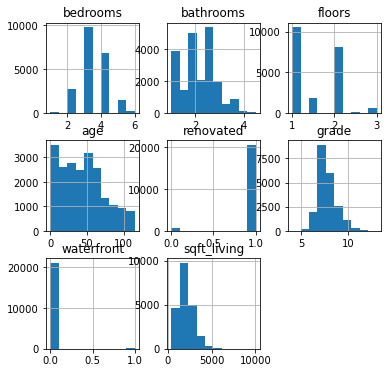

In [19]:
df[['bedrooms', 'bathrooms', 'floors', 'age','renovated','grade','waterfront','sqft_living']].hist(figsize  = [6, 6]); 

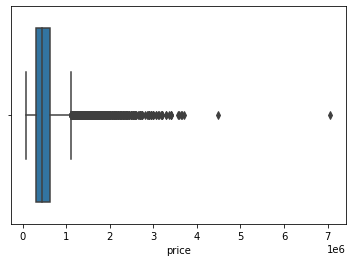

In [20]:
ax = sns.boxplot(x="price", data=df)

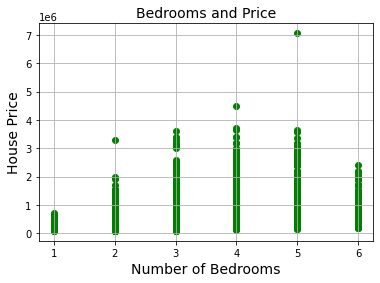

In [21]:
plt.scatter(df['bedrooms'], df['price'], color='green')
plt.title('Bedrooms and Price', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

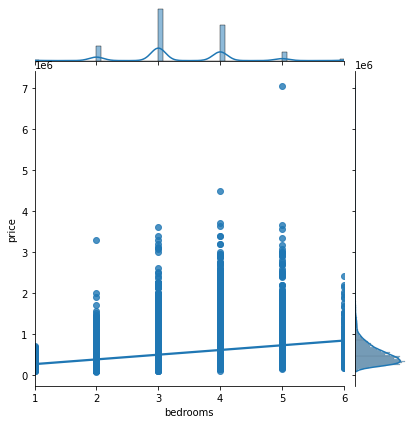

In [22]:
sns.jointplot(data=df, x="bedrooms", y="price", kind="reg")

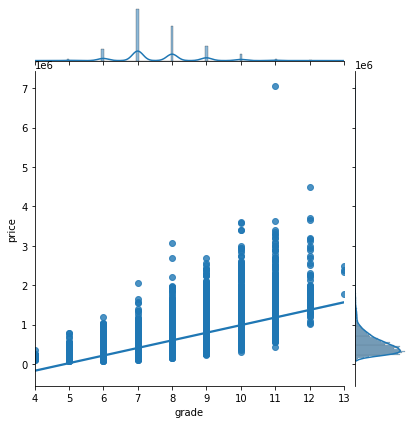

In [23]:
sns.jointplot(data=df, x="grade", y="price", kind="reg")

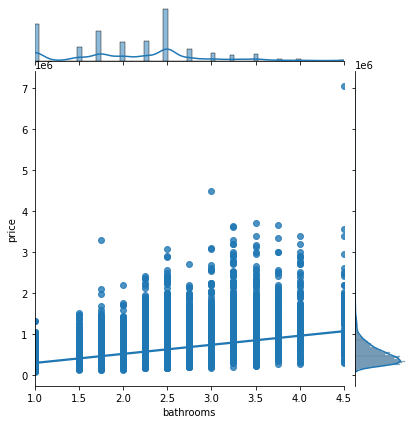

In [24]:
sns.jointplot(data=df, x="bathrooms", y="price", kind="reg")

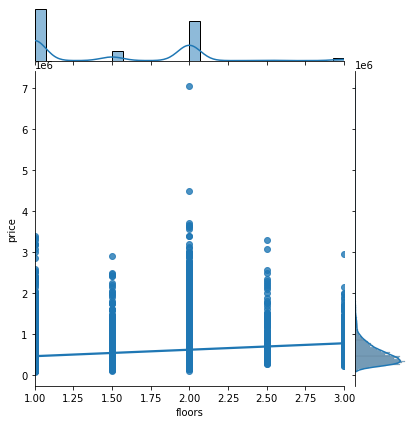

In [25]:
sns.jointplot(data=df, x="floors", y="price", kind="reg")

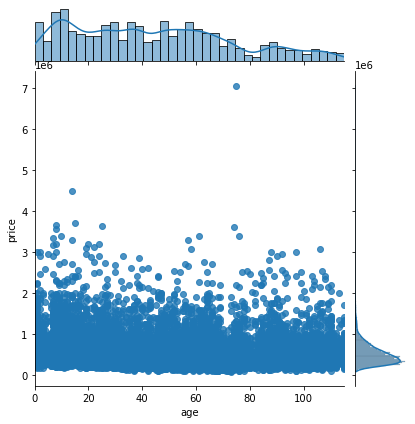

In [26]:
sns.jointplot(data=df, x="age", y="price", kind="reg")

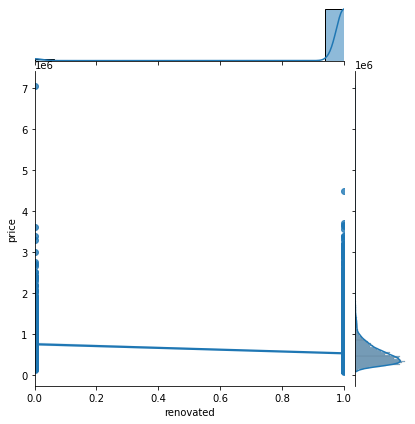

In [27]:
sns.jointplot(data=df, x="renovated", y="price", kind="reg")

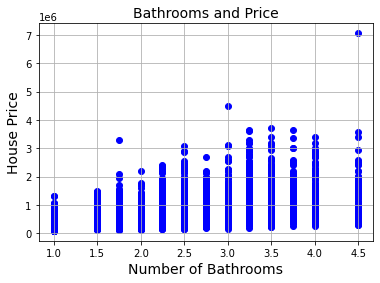

In [28]:
plt.scatter(df['bathrooms'], df['price'], color='blue')
plt.title('Bathrooms and Price', fontsize=14)
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

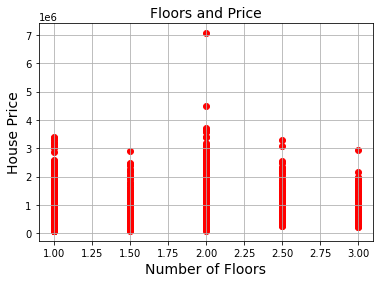

In [29]:
plt.scatter(df['floors'], df['price'], color='red')
plt.title('Floors and Price', fontsize=14)
plt.xlabel('Number of Floors', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

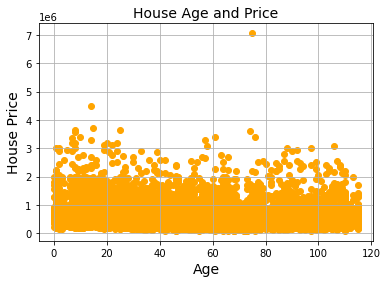

In [30]:
plt.scatter(df['age'], df['price'], color='orange')
plt.title('House Age and Price', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

## Model 1

In [31]:
def tts_model(df):
    y = df['price']
    X = df.drop(columns=['price'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
    
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    mse_train = mean_squared_error(y_train, train_predictions)
    mse_test = mean_squared_error(y_test, test_predictions)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('Test RMSE:', np.sqrt(mse_test))
    print('Train RMSE:', np.sqrt(mse_train))
    print('Training Score:', round(train_score, 2))
    print('Test Score:', round(test_score, 2))
    print('Coefficients:', model.coef_)

    X_train = sm.add_constant(X_train)
    smmodel = sm.OLS(y_train, X_train).fit()
    print(smmodel.summary())
    return smmodel

In [32]:
model = tts_model(df)

Test RMSE: 185212.77987405876
Train RMSE: 183591.8060651776
Training Score: 0.69
Test Score: 0.68
Coefficients: [ 1.80491024e+02 -3.43265701e+04  1.92287809e+04 -5.58838958e+03
  1.10775024e+05  3.11113403e+04 -6.68291343e+04  7.19920196e+05
 -1.40294460e+04  1.55210948e+03]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     3831.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:38:32   Log-Likelihood:            -2.3060e+05
No. Observations:               17032   AIC:                         4.612e+05
Df Residuals:                   17021   BIC:                         4.613e+05
Df Model:                          10                                         
Covariance Ty

<Figure size 864x576 with 0 Axes>

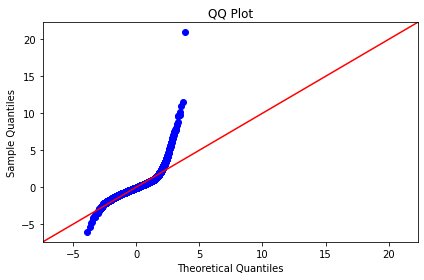

In [33]:
plt.figure(figsize=(12, 8))
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.tight_layout()

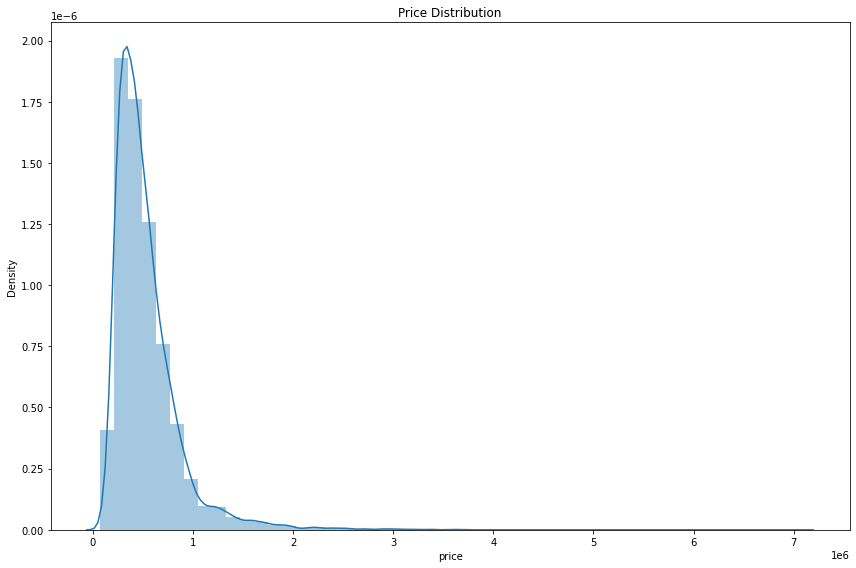

In [34]:
plt.figure(figsize=(12, 8))
sns.distplot(df.price)
plt.title('Price Distribution')
plt.tight_layout()

## Model 2 (Normalizing Price)

In [35]:
df = df[df['price'] <= 1000001]

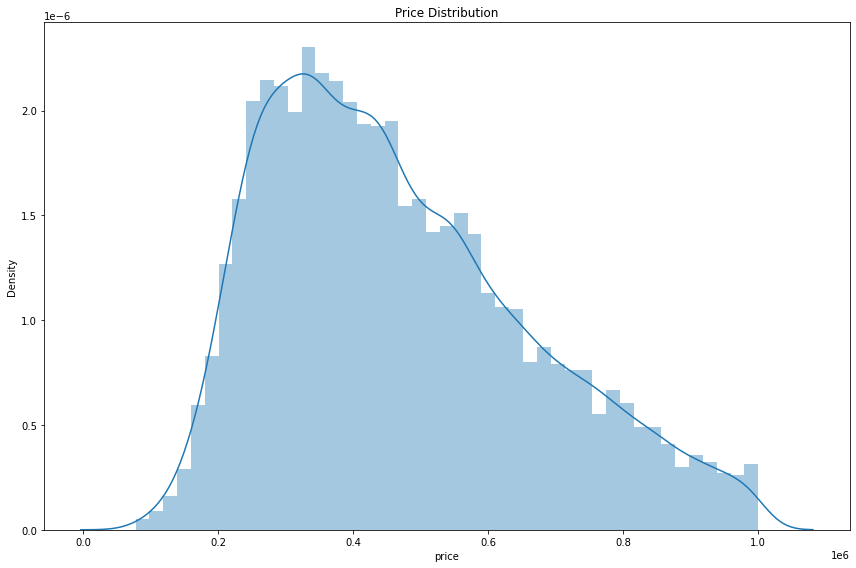

In [36]:
plt.figure(figsize=(12, 8))
sns.distplot(df.price)
plt.title('Price Distribution')
plt.tight_layout()

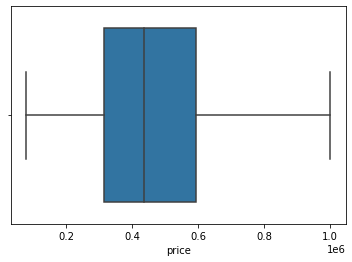

In [37]:
ax = sns.boxplot(x="price", data=df)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19967 entries, 0 to 21595
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19967 non-null  float64
 1   sqft_living  19967 non-null  int64  
 2   bedrooms     19967 non-null  int64  
 3   bathrooms    19967 non-null  float64
 4   floors       19967 non-null  float64
 5   grade        19967 non-null  int64  
 6   condition    19967 non-null  int64  
 7   renovated    19967 non-null  int32  
 8   waterfront   19967 non-null  float64
 9   distance     19967 non-null  float64
 10  age          19967 non-null  int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 1.8 MB


In [104]:
model = tts_model(df)

Test RMSE: 116300.25070882677
Train RMSE: 118230.5826784761
Training Score: 0.64
Test Score: 0.65
Coefficients: [ 1.14194351e+02 -1.48798380e+04  1.30532362e+04  1.03094704e+04
  8.25511055e+04  2.34649817e+04 -2.86649532e+04  2.02536792e+05
 -1.05013836e+04  1.08555823e+03]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     2789.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:52:51   Log-Likelihood:            -2.0924e+05
No. Observations:               15973   AIC:                         4.185e+05
Df Residuals:                   15962   BIC:                         4.186e+05
Df Model:                          10                                         
Covariance Ty

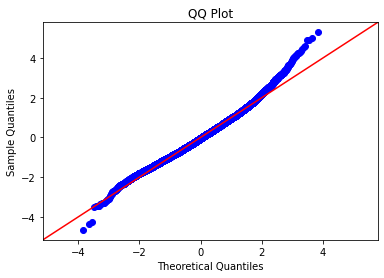

In [105]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.show()

## Model 3 (Multicollinearity)

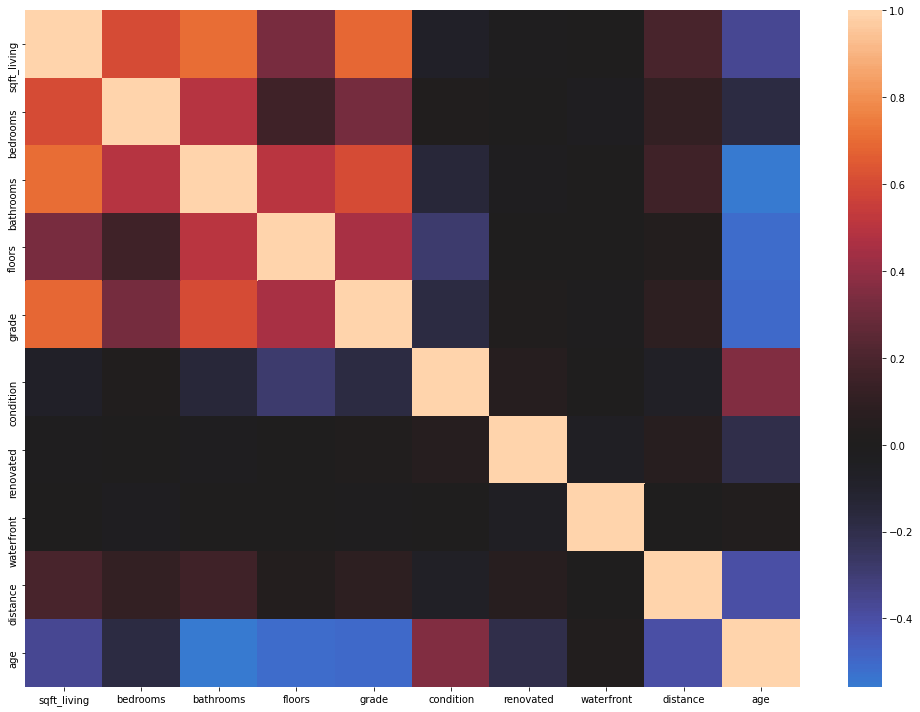

In [106]:
X = df.drop(columns=['price'], axis=1)
plt.figure(figsize=(14, 10))
sns.heatmap(X.corr(), center=0)
plt.tight_layout()
plt.show()

In [107]:
abs(X.corr()) >= .7

,sqft_living,bedrooms,bathrooms,floors,grade,condition,renovated,waterfront,distance,age
sqft_living,True,False,True,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False
bathrooms,True,False,True,False,False,False,False,False,False,False
floors,False,False,False,True,False,False,False,False,False,False
grade,False,False,False,False,True,False,False,False,False,False
condition,False,False,False,False,False,True,False,False,False,False
renovated,False,False,False,False,False,False,True,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False
distance,False,False,False,False,False,False,False,False,True,False
age,False,False,False,False,False,False,False,False,False,True


In [108]:
corr_df = X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# Zip the variable name columns in a  column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# Set index to pairs
corr_df.set_index(['pairs'], inplace = True)

# Drop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# Rename correlation column to cc
corr_df.columns = ['cc']

# Drop duplicates
corr_df.drop_duplicates(inplace=True)

In [109]:
corr_df[(corr_df.cc>.70) & (corr_df.cc <1)]

,cc
pairs,
"(sqft_living, bathrooms)",0.703893


In [110]:
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_dict = dict(zip(X.columns, vif))
vif_dict

{'const': 227.37496098764228,
 'sqft_living': 3.3946435487595905,
 'bedrooms': 1.6706372476090992,
 'bathrooms': 2.868144204903143,
 'floors': 1.639885479908926,
 'grade': 2.4537733240600215,
 'condition': 1.2072300584062265,
 'renovated': 1.0994499286122625,
 'waterfront': 1.0051787242619208,
 'distance': 1.330179844652576,
 'age': 2.5485812188994252}

In [111]:
tts_model(df)

Test RMSE: 116300.25070882677
Train RMSE: 118230.5826784761
Training Score: 0.64
Test Score: 0.65
Coefficients: [ 1.14194351e+02 -1.48798380e+04  1.30532362e+04  1.03094704e+04
  8.25511055e+04  2.34649817e+04 -2.86649532e+04  2.02536792e+05
 -1.05013836e+04  1.08555823e+03]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     2789.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:52:59   Log-Likelihood:            -2.0924e+05
No. Observations:               15973   AIC:                         4.185e+05
Df Residuals:                   15962   BIC:                         4.186e+05
Df Model:                          10                                         
Covariance Ty

## Model 4 (Removing Insignificant Features)

In [112]:
df = df.drop(columns=['renovated'], axis=1)

In [113]:
tts_model(df)

Test RMSE: 116269.10997111059
Train RMSE: 118323.48748544577
Training Score: 0.64
Test Score: 0.65
Coefficients: [ 1.14070516e+02 -1.51465282e+04  1.46418685e+04  1.09565579e+04
  8.27169236e+04  2.23230332e+04  2.07430535e+05 -1.04481692e+04
  1.16167759e+03]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3092.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:53:01   Log-Likelihood:            -2.0925e+05
No. Observations:               15973   AIC:                         4.185e+05
Df Residuals:                   15963   BIC:                         4.186e+05
Df Model:                           9                                         
Covariance Type:            

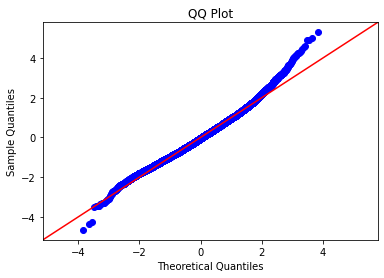

In [114]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.show()

## Model 5 Adjusting for Outliers

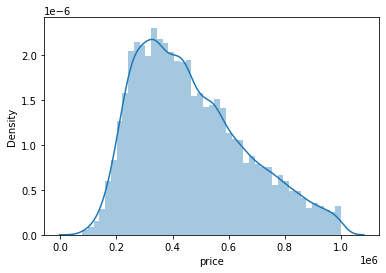

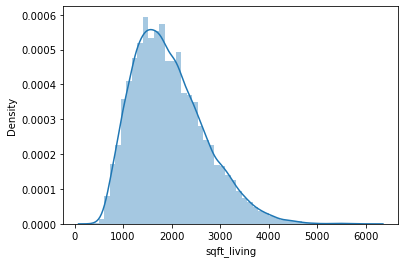

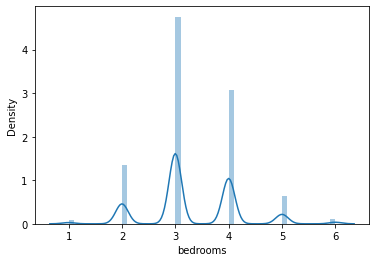

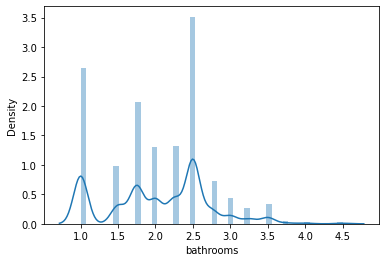

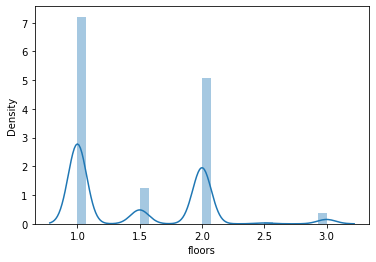

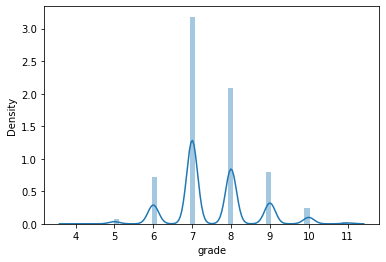

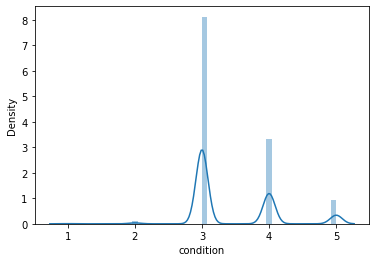

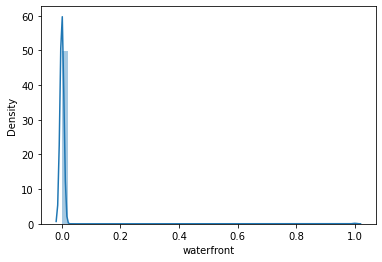

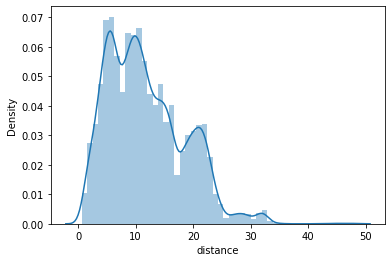

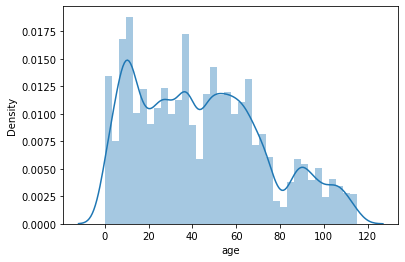

In [115]:
#View distribution plots for all columns
for col in df.columns:
    plt.subplots(1, 1)
    sns.distplot(df[col])

In [116]:
df = df[df['sqft_living'] < 5000]
df = df[df['bathrooms'] < 4.0]
df = df[df['floors'] < 3.5]

In [40]:
df['bedrooms'].max()

6

In [117]:
tts_model(df)

Test RMSE: 118699.94682993456
Train RMSE: 117268.67577402372
Training Score: 0.64
Test Score: 0.63
Coefficients: [ 1.15845494e+02 -1.55779243e+04  1.56622948e+04  1.37796855e+04
  8.13836011e+04  2.28256498e+04  1.96048576e+05 -1.04005570e+04
  1.17294712e+03]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     3094.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:53:09   Log-Likelihood:            -2.0798e+05
No. Observations:               15887   AIC:                         4.160e+05
Df Residuals:                   15877   BIC:                         4.161e+05
Df Model:                           9                                         
Covariance Type:            

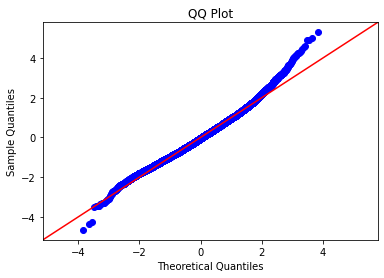

In [118]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.show()

## Homoscedascity

In [119]:
y = df['price']
X = df.drop(columns=['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
    
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

mse_train = mean_squared_error(y_train, train_predictions)
mse_test = mean_squared_error(y_test, test_predictions)
    
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print('Test RMSE:', np.sqrt(mse_test))
print('Train RMSE:', np.sqrt(mse_train))
print('Training Score:', round(train_score, 2))
print('Test Score:', round(test_score, 2))
print('Coefficients:', model.coef_)

X_train = sm.add_constant(X_train)
smmodel = sm.OLS(y_train, X_train).fit()
print(smmodel.summary())

Test RMSE: 118699.94682993456
Train RMSE: 117268.67577402372
Training Score: 0.64
Test Score: 0.63
Coefficients: [ 1.15845494e+02 -1.55779243e+04  1.56622948e+04  1.37796855e+04
  8.13836011e+04  2.28256498e+04  1.96048576e+05 -1.04005570e+04
  1.17294712e+03]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     3094.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:53:12   Log-Likelihood:            -2.0798e+05
No. Observations:               15887   AIC:                         4.160e+05
Df Residuals:                   15877   BIC:                         4.161e+05
Df Model:                           9                                         
Covariance Type:            

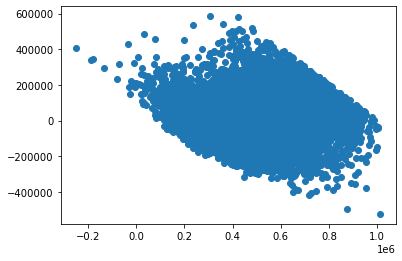

In [124]:
plt.scatter(train_predictions, smmodel.resid)


## Plots!

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(df['distance'], df['price'])
plt.title('Price vs. Distance', fontsize=16)
plt.xlabel('Distance')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(df.grade, df.age)
plt.title('Building Grade vs. Age of Home', fontsize=16)
plt.xlabel('Grade')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(df.grade, df.price)
plt.title('Building Grade vs. Sale Price', fontsize=16)
plt.xlabel('Grade')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [ ]:
bedrooms_1_5 = df.loc[(df['distance'] <= 5) & (df['bedrooms'] < 2)]
bedrooms_2_5 = df.loc[(df['distance'] <= 5) & (df['bedrooms'] >= 2) & (df['bedrooms'] < 3)]
bedrooms_3_5 = df.loc[(df['distance'] <= 5) & (df['bedrooms'] >= 3) & (df['bedrooms'] < 4)]
bedrooms_4_5 = df.loc[(df['distance'] <= 5) & (df['bedrooms'] == 4)]

In [ ]:
bedrooms_1 = df.loc[(df['distance'] > 5) & (df['bedrooms'] < 2)]
bedrooms_2 = df.loc[(df['distance'] > 5) & (df['bedrooms'] >= 2) & (df['bedrooms'] < 3)]
bedrooms_3 = df.loc[(df['distance'] > 5) & (df['bedrooms'] >= 3) & (df['bedrooms'] < 4)]
bedrooms_4 = df.loc[(df['distance'] > 5) & (df['bedrooms'] == 4)]

In [ ]:
names = ['1 Bedroom Houses', '2 Bedroom Houses', '3 Bedroom Houses', '4 Bedroom Houses']
medians_5 = [bedrooms_1_5.price.median(), bedrooms_2_5.price.median(), bedrooms_3_5.price.median(), bedrooms_4_5.price.median()]
medians = [bedrooms_1.price.median(), bedrooms_2.price.median(), bedrooms_3.price.median(), bedrooms_4.price.median()]

In [ ]:
sns.set_palette('Reds_r')
plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)
sns.barplot(medians_5, names)
for i in range(len(medians_5)):
    plt.text(x= (medians_5[i]/2) - 50000, y=i, s=int(medians_5[i]), c='white', fontsize=14)
plt.title('Less Than 5 Miles to Downtown', fontsize=16)
plt.xlabel('Price')
plt.yticks(fontsize=14)

plt.subplot(1, 2, 2)
for i in range(len(medians)):
    plt.text(x= (medians[i]/2) - 50000, y=i, s=int(medians[i]), c='white', fontsize=14)
sns.barplot(medians, names)
plt.title('More Than 5 Miles from Downtown', fontsize=16)
plt.xlabel('Price')
plt.yticks(fontsize=14)
plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.show()